# Можете ли вы предсказать цену на основе полученных данных? Классифицируйте по городу, провинции, цвету, типу кузова, производителю, модели, дате выпуска, мощности двигателя, регистрационному номеру и т.д.

# Модуль 1

In [1]:
# базовые библиотеки
import numpy as np 
import pandas as pd

# графические библиотеки
import matplotlib.pyplot as plt 
import seaborn as sns

# дополнительная библиотека чтобы игнорировать предупреждения при выполнении кода (необязательно к применению)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_json('usedCars.json') # стандартная выгрузка json

In [3]:
df.head() # смотрим

,usedCars
0,"{'@type': 'Car', 'brand': {'@type': 'Brand', '..."
1,"{'@type': 'Car', 'brand': {'@type': 'Brand', '..."
2,"{'@type': 'Car', 'brand': {'@type': 'Brand', '..."
3,"{'@type': 'Car', 'brand': {'@type': 'Brand', '..."
4,"{'@type': 'Car', 'brand': {'@type': 'Brand', '..."


In [4]:
from pandas import json_normalize
import json

# Загрузка данных из JSON файла в отдельную переменную
with open('usedCars.json') as f:
    data = json.load(f)

# Применение через json_normalize ко всему датафрейму 
df = json_normalize(data, 'usedCars')

from pandas import json_normalize: Импорт функции json_normalize из библиотеки pandas. Эта функция используется для нормализации данных JSON в формат DataFrame.

import json: Импорт модуля json, который предоставляет методы для работы с данными в формате JSON.

with open('usedCars.json') as f: Открывает файл 'usedCars.json' в режиме чтения.
json.load(f): Считывает данные из файла с использованием модуля json и сохраняет их в переменной data. Теперь data представляет собой структуру данных в формате JSON.

json_normalize(data, 'usedCars'): Применение функции json_normalize к столбцу 'usedCars' из структуры данных data. Результат сохраняется в переменной df. Теперь df представляет собой DataFrame, где каждая строка соответствует объекту из столбца 'usedCars' и его атрибутам.

In [5]:
df.head().T

,0,1,2,3,4
@type,Car,Car,Car,Car,Car
model,Mehran,Pajero,Cultus,Corolla,City
description,I m 100% original. Alloy Rims. New tires inst...,Read Full Discription First\n\nIts Super Selec...,1 piece touch first owner new tyre urgent sale...,Axio luxel alfa 2007 model full option sensor ...,100% original.
itemCondition,used,used,used,used,used
modelDate,2013,1992,2016,2007,2013
manufacturer,Suzuki,Mitsubishi,Suzuki,Toyota,Honda
fuelType,Petrol,Petrol,Petrol,Petrol,Petrol
name,Suzuki Mehran 2013 for sale in Rawalpindi,Mitsubishi Pajero 1992 for sale in Islamabad,Suzuki Cultus 2016 for sale in Lahore,Toyota Corolla 2007 for sale in Peshawar,Honda City 2013 for sale in Lahore
image,https://cache1.pakwheels.com/ad_pictures/5534/...,https://cache2.pakwheels.com/ad_pictures/5543/...,https://cache3.pakwheels.com/ad_pictures/5533/...,https://cache1.pakwheels.com/ad_pictures/5533/...,None
vehicleTransmission,Manual,Automatic,Manual,Automatic,Manual


In [6]:
print(f"Полностью: {df.shape}")
print(f"Кол-во строк: {df.shape[0]}")
print(f"Кол-во столбцов: {df.shape[1]}")

Полностью: (55675, 37)
Кол-во строк: 55675
Кол-во столбцов: 37


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55675 entries, 0 to 55674
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   @type                             55675 non-null  object
 1   model                             55675 non-null  object
 2   description                       55675 non-null  object
 3   itemCondition                     55675 non-null  object
 4   modelDate                         55675 non-null  int64 
 5   manufacturer                      55675 non-null  object
 6   fuelType                          55675 non-null  object
 7   name                              55675 non-null  object
 8   image                             53600 non-null  object
 9   vehicleTransmission               55675 non-null  object
 10  color                             55675 non-null  object
 11  bodyType                          48724 non-null  object
 12  mileageFromOdomete

In [8]:
df = df.drop(columns = ['@type', 'description', 'itemCondition', 'fuelType', 'name', 'image', 'color', 'bodyType', 'postedFrom', 'keywords', 
                        'adLastUpdated', 'priceCurrency', 'brand.@type', 'brand.name', 'vehicleEngine.@type', 'vehicleEngine.engineDisplacement',
                        'extraFeatures.RegisteredIn', 'extraFeatures.Color', 'extraFeatures.Assembly', 'extraFeatures.EngineCapacity', 'extraFeatures.BodyType', 
                        'extraFeatures.LastUpdated:', 'extraFeatures.AdRef#', 'extraFeatures.AuctionGrade', 'extraFeatures.ChassisNo.', 'extraFeatures.ImportDate',
                        'extraFeatures.BatteryCapacity', 'extraFeatures.Warranty', 'extraFeatures'])

Удаляем не нужные признаки для обучения

@type: Vehicle type - @тип: Тип транспортного средства

model: Vehicle model - модель: Модель транспортного средства

description: Ad/vehicle description - описание: Объявление/описание транспортного средства

itemCondition: vehicle condition - Состояние товара: состояние транспортного средства

modelDate: vehicle model release date - Дата выпуска модели: дата выпуска модели транспортного средства

manufacturer: vehicle manufacturer - производитель: производитель транспортных средств

fuelType vehicle fuel type - тип топлива тип топлива транспортного средства

name: Ad title - название: Заголовок объявления

image: ad/vehicle cover image - изображение: реклама /изображение с обложки автомобиля

vehicleTransmission: vehicle transmission type(manual, automatic) - Трансмиссия транспортного средства: тип коробки передач транспортного средства (механическая, автоматическая)

color: vehicle color - цвет: цвет автомобиля

bodyType: vehicle body type - Тип кузова: тип кузова транспортного средства

mileageFromOdometer: km's the vehicle has driven - Измеритель пробега: километры, которые проехал автомобиль

sellerLocation: seller location - Местоположение продавца: местоположение продавца

postedFrom: platform ad posted from - Опубликовано с: объявление платформы, размещенное с

keywords: ad search keywords - ключевые слова: ключевые слова для поиска рекламы

features: list of features available in the car. e.g: AC, Power windows, etc. - особенности: список функций, доступных в автомобиле. например: кондиционер, электрические стеклоподъемники и т.д.

adLastUpdated: Ad last updated date - adLastUpdated: Дата последнего обновления объявления

price: Asking price - цена: Запрашиваемая цена

priceCurrency: Currency. e.g: PKR, USD. - Валюта цены: Валюта. например: PKR, USD.

---------------------------------------------

brand:{ - марка
    
    @type: - тип
    name: vehicle brand name - название: марка транспортного средства
}

vehicleEngine:{ - Двигатель транспортного средства
    
    @type:
    
    engineDisplacement: km's the vehicle has driven -  Расположение двигателя: км, пройденные транспортным средством
}

extraFeatures: { - Дополнительные характеристики
    
    RegisteredIn: city the vehicle is registered in.

    Color: vehicle color
    
    Assembly: vehicle assembly location(local, imported
    
    EngineCapacity: engine capacity in cubic centimeters(cc)
    
    BodyType: vehicle body type
    
    LastUpdated: Ad last updated

    AdRef#: Ad reference number
    
    AuctionGrade: a detailed explanation on auction grade
    
    ChassisNo.:
    
    ImportDate: vehicle import date
    
    BatteryCapacity: vehicle battery capacity
    
    Warranty: warranty in combination of time duration and distance traveled
}

Дополнительные характеристики


 Зарегистрирован в: город, в котором зарегистрировано транспортное средство.

 Цвет: цвет транспортного средства
 
 Сборка: место сборки транспортного средства (местное, импортное)
 
 Мощность двигателя: объем двигателя в кубических сантиметрах (куб.см)
 
 Тип кузова: тип кузова транспортного средства
 
 Последнее обновление: Последнее обновление объявления

 Адрес #: Ссылочный номер объявления
 
 Оценка аукциона: подробное объяснение оценки аукциона
 
 Шасси нет.:
 
 ImportDate: дата импорта транспортного средства
 
 Емкость аккумулятора: емкость аккумулятора транспортного средства
 
 Гарантия: гарантия в зависимости от продолжительности времени и пройденного расстояния


In [9]:
df.head()

,model,modelDate,manufacturer,vehicleTransmission,mileageFromOdometer,sellerLocation,features,price
0,Mehran,2013,Suzuki,Manual,"42,000 km",Rawalpindi Punjab,"[AM/FM Radio, Alloy Rims, Cassette Player, Imm...",790000
1,Pajero,1992,Mitsubishi,Automatic,"82,400 km","Airport Enclave, Islamabad Islamabad","[AM/FM Radio, Air Bags, Air Conditioning, Allo...",2000000
2,Cultus,2016,Suzuki,Manual,"123,456 km",Lahore Punjab,"[AM/FM Radio, Air Conditioning, Alloy Rims, CD...",1265000
3,Corolla,2007,Toyota,Automatic,"71,000 km","Ring Road, Peshawar KPK","[ABS, AM/FM Radio, Air Bags, Air Conditioning,...",3500000
4,City,2013,Honda,Manual,11 km,Lahore Punjab,"[ABS, AM/FM Radio, Air Conditioning, Alloy Rim...",2075000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55675 entries, 0 to 55674
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   model                55675 non-null  object
 1   modelDate            55675 non-null  int64 
 2   manufacturer         55675 non-null  object
 3   vehicleTransmission  55675 non-null  object
 4   mileageFromOdometer  55675 non-null  object
 5   sellerLocation       55675 non-null  object
 6   features             55675 non-null  object
 7   price                55675 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 3.4+ MB


In [11]:
df['features'] = df['features'].apply(lambda x: ', '.join(map(str, x)))
# перезапись = какой признак.применить(записать в х то что перечисленно через запятую в виде строки)

df['features']: Это обращение к столбцу "features" в вашем DataFrame (df).

.apply(...): Этот метод применяет функцию к каждому элементу в столбце "features".

lambda x: ', '.join(map(str, x)): Это анонимная (безымянная) функция, которая принимает каждый элемент x в столбце "features" и выполняет следующее:

map(str, x): Это применение функции str (преобразование в строку) ко всем элементам в списке x.
', '.join(...): Это объединение элементов списка в строку, разделяя их запятой с пробелом.
Таким образом, вся конструкция lambda x: ', '.join(map(str, x)) преобразует каждый список в столбце "features" в строку, объединяя его элементы запятыми с пробелом.


lambda x - это анонимная (безымянная) функция в языке программирования Python, которая используется для создания кратких функций, которые могут быть переданы как аргументы в другие функции. В данном контексте, lambda x определяет функцию, принимающую аргумент x.

Более подробно:

lambda: Это ключевое слово, используемое для определения анонимной функции.
x: Это параметр (аргумент) функции. В данном случае, функция принимает один аргумент, который обозначен как x.

Здесь анонимная функция принимает аргумент x (каждый элемент списка) и выполняет операцию объединения элементов списка в строку с использованием запятых и пробелов. Это используется вместе с методом map, который применяет функцию str ко всем элементам списка x.


In [12]:
df['features'].unique()

array(['AM/FM Radio, Alloy Rims, Cassette Player, Immobilizer Key',
       'AM/FM Radio, Air Bags, Air Conditioning, Alloy Rims, Cassette Player, Keyless Entry, Power Locks, Power Mirrors, Power Steering, Power Windows, Sun Roof',
       'AM/FM Radio, Air Conditioning, Alloy Rims, CD Player', ...,
       'AM/FM Radio, Air Conditioning, Alloy Rims, CD Player, Cassette Player, Front Speakers, Keyless Entry, Power Locks, Power Steering, Rear Camera, Steering Switches, USB and Auxillary Cable',
       'ABS, AM/FM Radio, Air Bags, Air Conditioning, CD Player, DVD Player, Front Speakers, Immobilizer Key, Keyless Entry, Navigation System, Power Locks, Power Mirrors, Power Steering, Power Windows, Rear Camera, Steering Switches, USB and Auxillary Cable',
       'ABS, Air Bags, Air Conditioning, CD Player, Cruise Control, DVD Player, Navigation System, Power Locks, Power Mirrors, Power Steering, Power Windows'],
      dtype=object)

In [13]:
df.head()

,model,modelDate,manufacturer,vehicleTransmission,mileageFromOdometer,sellerLocation,features,price
0,Mehran,2013,Suzuki,Manual,"42,000 km",Rawalpindi Punjab,"AM/FM Radio, Alloy Rims, Cassette Player, Immo...",790000
1,Pajero,1992,Mitsubishi,Automatic,"82,400 km","Airport Enclave, Islamabad Islamabad","AM/FM Radio, Air Bags, Air Conditioning, Alloy...",2000000
2,Cultus,2016,Suzuki,Manual,"123,456 km",Lahore Punjab,"AM/FM Radio, Air Conditioning, Alloy Rims, CD ...",1265000
3,Corolla,2007,Toyota,Automatic,"71,000 km","Ring Road, Peshawar KPK","ABS, AM/FM Radio, Air Bags, Air Conditioning, ...",3500000
4,City,2013,Honda,Manual,11 km,Lahore Punjab,"ABS, AM/FM Radio, Air Conditioning, Alloy Rims...",2075000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55675 entries, 0 to 55674
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   model                55675 non-null  object
 1   modelDate            55675 non-null  int64 
 2   manufacturer         55675 non-null  object
 3   vehicleTransmission  55675 non-null  object
 4   mileageFromOdometer  55675 non-null  object
 5   sellerLocation       55675 non-null  object
 6   features             55675 non-null  object
 7   price                55675 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 3.4+ MB


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # экземпляр

df['model'] = le.fit_transform(df['model']) # кодирование
df['manufacturer'] = le.fit_transform(df['manufacturer'])
df['vehicleTransmission'] = le.fit_transform(df['vehicleTransmission'])
df['manufacturer'] = le.fit_transform(df['manufacturer'])
df['mileageFromOdometer'] = le.fit_transform(df['mileageFromOdometer'])
df['sellerLocation'] = le.fit_transform(df['sellerLocation'])
df['features'] = le.fit_transform(df['features'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55675 entries, 0 to 55674
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   model                55675 non-null  int32
 1   modelDate            55675 non-null  int64
 2   manufacturer         55675 non-null  int64
 3   vehicleTransmission  55675 non-null  int32
 4   mileageFromOdometer  55675 non-null  int32
 5   sellerLocation       55675 non-null  int32
 6   features             55675 non-null  int32
 7   price                55675 non-null  int64
dtypes: int32(5), int64(3)
memory usage: 2.3 MB


In [17]:
df.isnull().sum()

model                  0
modelDate              0
manufacturer           0
vehicleTransmission    0
mileageFromOdometer    0
sellerLocation         0
features               0
price                  0
dtype: int64

Смотрим ящики с усами

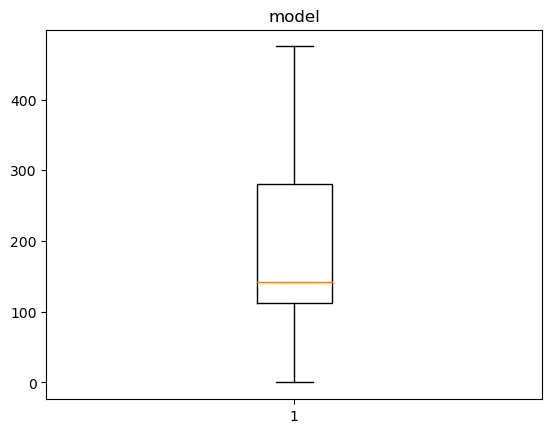

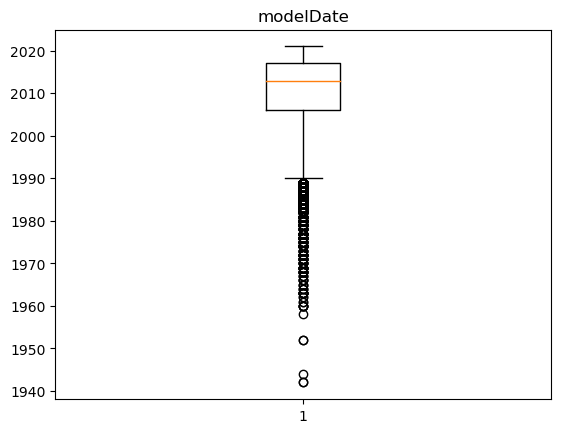

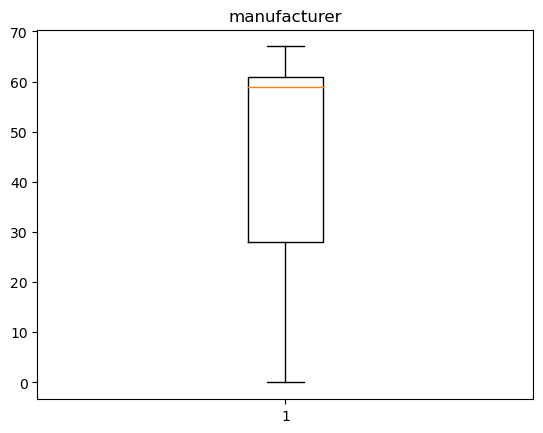

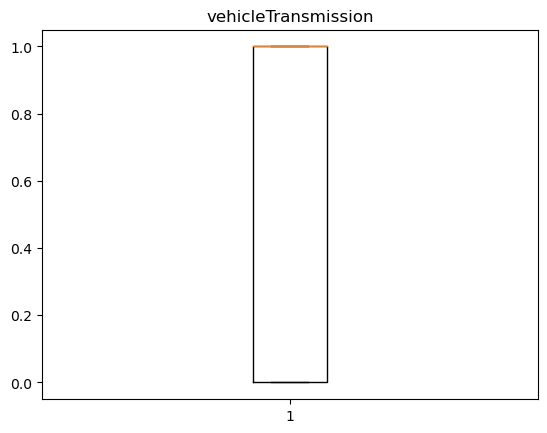

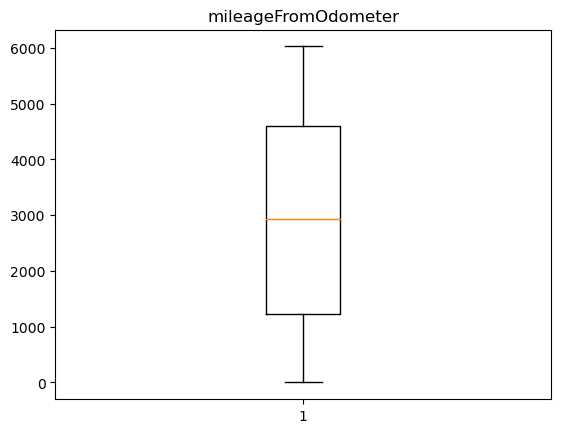

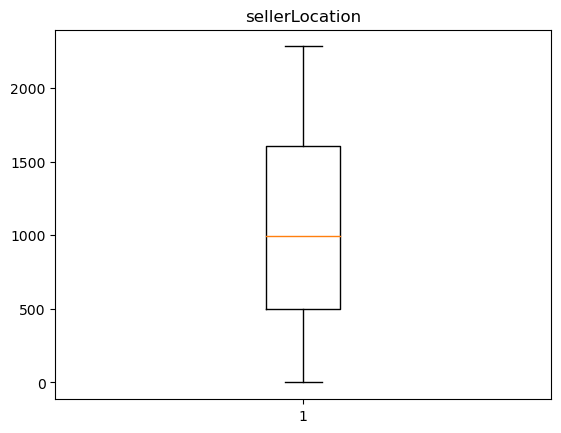

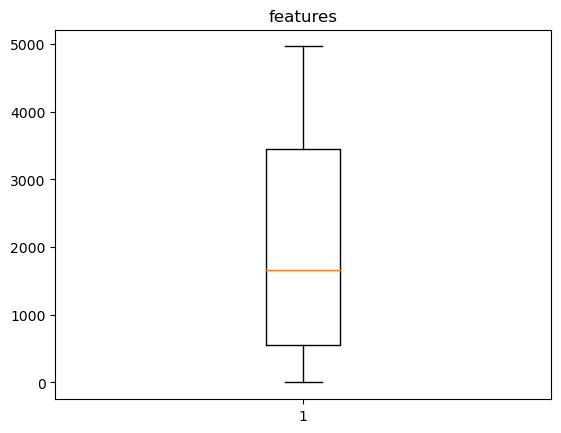

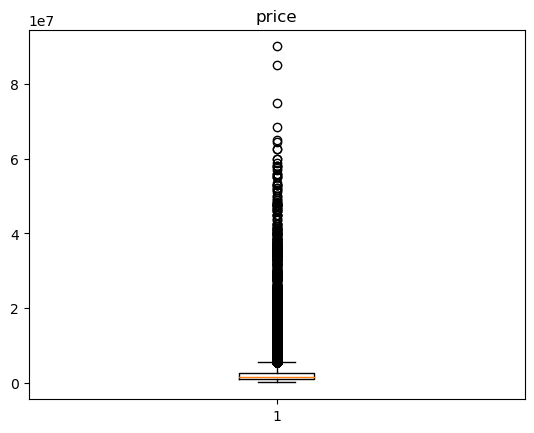

In [18]:
for i in df.describe().columns:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

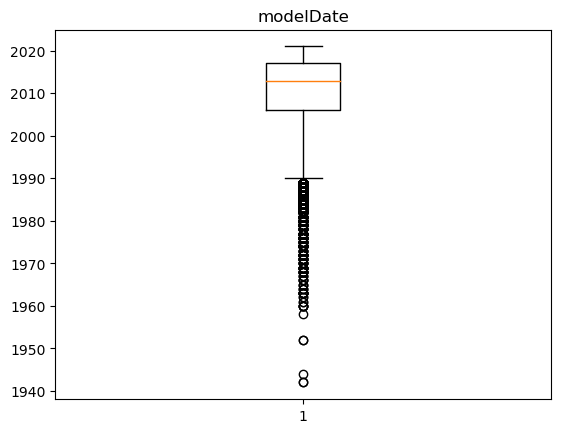

In [19]:
plt.boxplot(df['modelDate'])
plt.title('modelDate')
plt.show()

In [20]:
for i in range(1940, 1990, 5):    
    print(f"Количество записей {i}: {len(df[df['modelDate'] < i])}")

Количество записей 1940: 0
Количество записей 1945: 3
Количество записей 1950: 3
Количество записей 1955: 5
Количество записей 1960: 6
Количество записей 1965: 26
Количество записей 1970: 52
Количество записей 1975: 116
Количество записей 1980: 191
Количество записей 1985: 607


In [21]:
df.drop(index=df[df['modelDate'] < 1975].index, inplace=True)

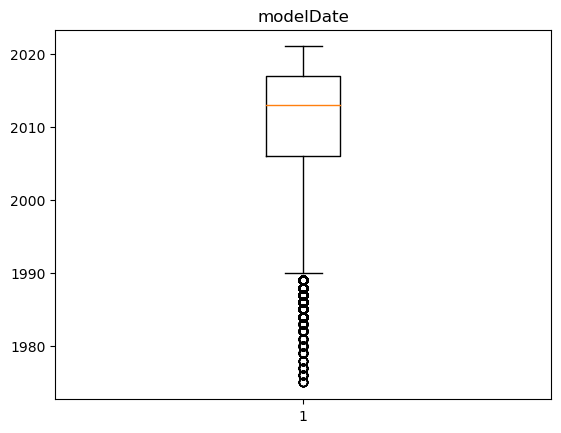

In [22]:
plt.boxplot(df['modelDate'])
plt.title('modelDate')
plt.show()

Принято решение не удалять остальные выбросы так как мы можем потерять большое количество данных

<Axes: >

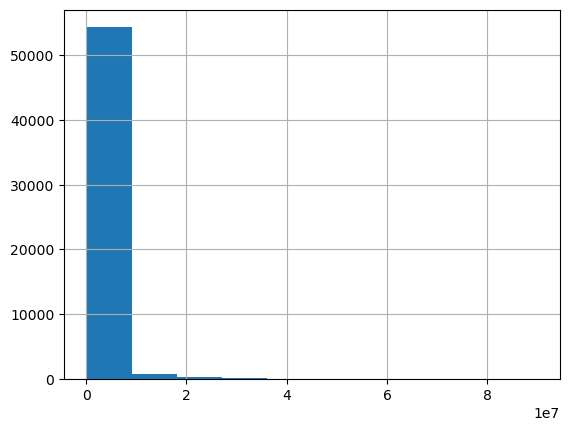

In [23]:
# Смотрим дисбаланс классов
df['price'].hist(bins=10)

<Axes: >

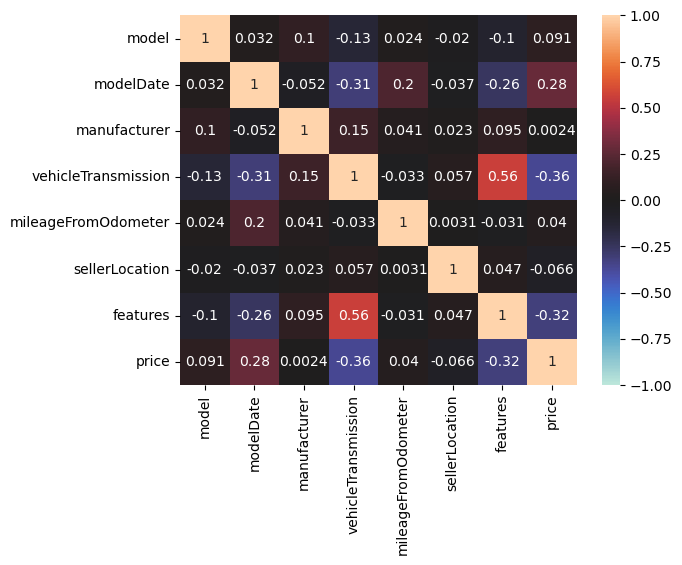

In [24]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)

In [25]:
from sklearn import metrics
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def print_metrics(y_test, y_pred):
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
y.value_counts(normalize=True)

price
750000     0.010745
1250000    0.010673
650000     0.010097
850000     0.009881
1350000    0.009341
             ...   
3349000    0.000018
4920000    0.000018
939000     0.000018
5999999    0.000018
6899000    0.000018
Name: proportion, Length: 1961, dtype: float64

In [28]:
y_train.value_counts(normalize=True)

price
750000      0.010889
1250000     0.010844
850000      0.010034
650000      0.009922
1350000     0.009179
              ...   
6899000     0.000022
10575000    0.000022
4165000     0.000022
1355550     0.000022
8220000     0.000022
Name: proportion, Length: 1815, dtype: float64

In [29]:
y_test.value_counts(normalize=True)

price
650000      0.010799
750000      0.010169
1250000     0.009989
1350000     0.009989
1750000     0.009989
              ...   
8399000     0.000090
5270000     0.000090
3630000     0.000090
4390000     0.000090
49000000    0.000090
Name: proportion, Length: 1134, dtype: float64

In [30]:
# Стандартизация данных - это процесс приведения данных к стандартному масштабу (улучшает модель)
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [31]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)
Ц
# Делаем предсказания на тестовом наборе
y_pred = model.predict(X_test)

print_metrics(y_test, y_pred)

MAE: 285596.1329759796
RMSE: 1241751.8228965716
R2: 0.8809763955783975
MAPE: 12.272695643753824


In [32]:
from sklearn.neighbors import KNeighborsRegressor

# Создаем модель KNN
knn_model = KNeighborsRegressor(n_neighbors=5)

# Обучаем модель на тренировочных данных
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print_metrics(y_test, y_pred)

MAE: 1070626.7169186464
RMSE: 2967629.058414085
R2: 0.32019756563570656
MAPE: 54.06687551940418


In [33]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression1 = LinearRegression()

# Обучили модель на тренировочной выборке
model_regression1.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке
y_pred = model_regression1.predict(X_test)

print_metrics(y_test, y_pred)

MAE: 1327054.2425462683
RMSE: 3255541.9303560704
R2: 0.18189306877254263
MAPE: 72.38193719806264


In [34]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)
print('Лучшее значение параметра:', lasso_cv.alpha_)

# Сделали прогнозы
y_pred = lasso_cv.predict(X_test)

print_metrics(y_test,y_pred)

Лучшее значение параметра: 1674081.9601691677
MAE: 1327043.7279382572
RMSE: 3329683.948168084
R2: 0.14420546171682325
MAPE: 82.86362876801216
